In [1]:
import pandas as pd
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()


In [3]:
df= pd.DataFrame(digits.data)

In [5]:
df['target']=digits.target

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [9]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test= tts(df.drop('target',axis='columns'),df.target,test_size=0.2)

In [11]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [12]:
model.score(X_test,y_test)

0.9888888888888889

Confusion matrix

In [14]:
import matplotlib as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [21]:
y_predict=model.predict(X_test)
cm=confusion_matrix(y_test,y_predict)
cm

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 28,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 26,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 35]], dtype=int64)

Text(69.0, 0.5, 'Truth')

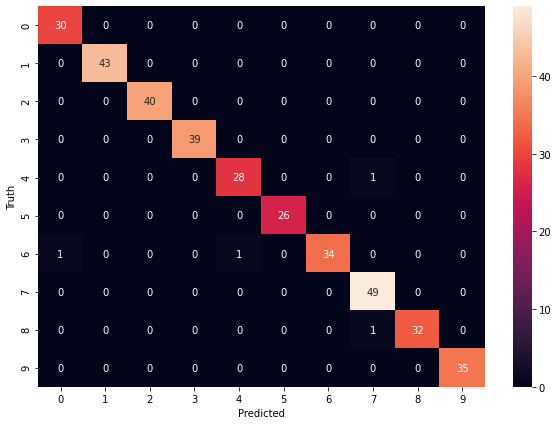

In [25]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
